# Final Assignment NLP - Or Ancho

Upload Libraries required for the task

In [2]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve
import matplotlib.pyplot as plt

Import the dataset and clean missing values

In [4]:
df=pd.read_csv("/Users/orancho/Desktop/NLP/train_df.csv")
df.dropna(inplace=True)
df

,ID,keywords,age,sex
1,361410,forum:3;contrat:1;calcul:3;conges:1;mission:4;...,47,M
2,211450,villa:1;location:2;aquitaine:2;maison:1;vacanc...,61,F
3,1368807,trafic:1;tournante:1;drogue:1;france:1;plaque:...,45,M
4,3502570,trafic:1;septembre:1;greve:1;sncf:1;sortir:1;p...,22,M
5,2027488,darmanin:1;pour:1;ferme:1;jcms:1;conjoncture:1...,55,M
...,...,...,...,...
999993,878235,prenoms:1;prenom:1;aidan:1,33,F
999994,730507,programme:1;hemorroides:1;moix:1;symptomes:1;c...,43,M
999996,1351077,comment:1;faq:1;choisir:1;velo:1;avec:1;joueur...,53,M
999997,40194,salon:1;clash:1;maman:5;gout:1;doues:1;addicti...,54,F


Enhance interpretability of code by changing M to 1 and F to 0

In [7]:
df["sex"]=df["sex"].replace("M",1)
df["sex"]=df["sex"].replace("F",0)
df.head()

,ID,keywords,age,sex
1,361410,forum:3;contrat:1;calcul:3;conges:1;mission:4;...,47,1
2,211450,villa:1;location:2;aquitaine:2;maison:1;vacanc...,61,0
3,1368807,trafic:1;tournante:1;drogue:1;france:1;plaque:...,45,1
4,3502570,trafic:1;septembre:1;greve:1;sncf:1;sortir:1;p...,22,1
5,2027488,darmanin:1;pour:1;ferme:1;jcms:1;conjoncture:1...,55,1


# Data Cleaning - Train

In [8]:
#random sample of 10% train set
df = df.sample(frac=0.1, replace=True, random_state=1)

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/orancho/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
stop_words = stopwords.words()
porter = PorterStemmer()
def cleantext(counttext):
    wordcounts=counttext.split(";")
    text=""
    for words in wordcounts:
        wordocr=words.split(":")
        if len(wordocr)>1 and not wordocr[0] in stop_words :
            wordocr[0]=porter.stem(wordocr[0])
            text+=(wordocr[0]+" ")*int(wordocr[1])
    return text

In [12]:
df=df[df["keywords"].str.contains(":")]

In [13]:
df["keywords"]=df["keywords"].map(lambda x: cleantext(x))

In [14]:
df.dropna(inplace=True)
df.to_csv("train_clean.csv",index=False,sep=',')

In [15]:
df.head(10)

,ID,keywords,age,sex
144969,294784,presidentiel chalon baroin champagn elect sena...,60,0
556862,136272,binoch binoch binoch binoch binoch binoch bino...,57,1
533265,500083,gregori gaga marc christian luchini femm perna...,40,0
896123,202823,pourquoi_inscript recap_cv ma_recherch mon_par...,28,1
556301,130153,beton mettr pui percer chevil poutr affich forum,37,1
946753,82178,kaia kaia supermodel francais tout manifest ma...,42,1
420618,370992,emploi detail_offr,44,1
83032,322797,copain crusn arranc chateau ecol pierret pierr...,53,1
133144,137314,biscuit biscuit gouter gouter recett recett ga...,43,0
24242,3327176,2de2aecc0d85 contact like 3f5f bf5c news sugge...,36,0


# Data Cleaning - Test

We are going to perform some cleaning on the test dataset 

In [ ]:
test=pd.read_csv("/Users/orancho/Desktop/NLP/test_df.csv")
test.dropna(subset=["keywords"], inplace=True)
test=test[test["keywords"].str.contains(":")]

In [ ]:
test["keywords"]=test["keywords"].map(lambda x: cleantext(x))

In [ ]:
test.dropna(subset=["keywords"], inplace=True)
test.to_csv("test_clean.csv",index=False,sep=',')

# TFIDF Vectorizer

We upload our two newly created clean datasets and perform a vectorizer

In [3]:
df=pd.read_csv("/Users/orancho/Desktop/NLP/train_clean.csv")
test=pd.read_csv("/Users/orancho/Desktop/NLP/test_clean.csv")

Splitting the datasets into training and testing

In [4]:
X_train,X_test,y_train,y_test,z_train,z_test = train_test_split(df["keywords"],df["sex"],df["age"], test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(z_train.shape)
print(z_test.shape)

(70679,)
(17670,)
(70679,)
(17670,)
(70679,)
(17670,)


In [5]:
vc_tf_idf = TfidfVectorizer()
vc_tf_idf.fit(X_train.apply(lambda x: np.str_(x)))

TfidfVectorizer()

In [6]:
print("Vocabulary size: {}".format(len(vc_tf_idf.vocabulary_)))

Vocabulary size: 55707


In [7]:
X_train_tf = vc_tf_idf.transform(X_train.apply(lambda x: np.str_(x)))
X_train_tf[:3].nonzero()

(array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       dtype=int32),
 array([45051, 44598, 25270, 54891, 52823, 51032, 48987, 48597, 47053,
        45072, 44505, 44268, 43130, 35528, 34552, 34138, 33372, 26912,
        25869, 23768, 23443, 21836, 20839, 19356, 18619, 18598, 18449,
        15888, 11883, 11287,  8652, 52853, 45440, 45072, 41947, 36882,
        24044, 22339, 18099, 16255, 13636,  8646], dtype=int32))

# Modeling for "Sex" Prediction

We fit 3 models to evaluate their performance in predicting sex: Multinomial, Logistic regression and random forest

In [8]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train_tf,y_train)

MultinomialNB()

In [9]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_tf,y_train)

LogisticRegression(max_iter=10000)

In [10]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=2000,max_depth=8)
rfc.fit(X_train_tf,y_train)

RandomForestClassifier(max_depth=8, n_estimators=2000)

In [11]:
X_test_tf = vc_tf_idf.transform(X_test.apply(lambda x: np.str_(x)))

In [12]:
predictionsex = dict()
predictionsex["mnb"] = mnb.predict(X_test_tf)
predictionsex["logreg"] = logreg.predict(X_test_tf)
predictionsex["rfc"] = rfc.predict(X_test_tf)

In [14]:
print(classification_report(y_test,predictionsex["mnb"]))
#Test result on MultinomialNB

              precision    recall  f1-score   support

           0       0.62      0.43      0.51      8223
           1       0.61      0.78      0.68      9447

    accuracy                           0.61     17670
   macro avg       0.62      0.60      0.59     17670
weighted avg       0.62      0.61      0.60     17670



In [15]:
print(classification_report(y_test,predictionsex["logreg"]))
#Test result on LogisticRegression

              precision    recall  f1-score   support

           0       0.60      0.49      0.54      8223
           1       0.62      0.72      0.67      9447

    accuracy                           0.61     17670
   macro avg       0.61      0.61      0.60     17670
weighted avg       0.61      0.61      0.61     17670



In [16]:
print(classification_report(y_test,predictionsex["rfc"]))
#Test result on Randomforest Classifier

              precision    recall  f1-score   support

           0       0.84      0.07      0.12      8223
           1       0.55      0.99      0.71      9447

    accuracy                           0.56     17670
   macro avg       0.70      0.53      0.41     17670
weighted avg       0.69      0.56      0.43     17670



In [17]:
accuracy_score(y_test,predictionsex["logreg"])
#Logistic regression has the best accuracy

0.6138087153367289

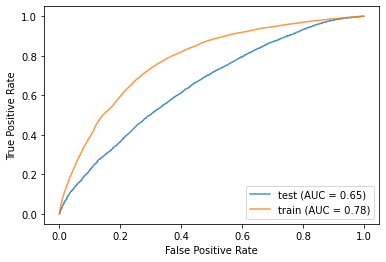

In [18]:
ax = plt.gca()
test_rf = plot_roc_curve(logreg, X_test_tf, y_test,ax=ax, alpha=0.8, name="test")
train_rf = plot_roc_curve(logreg,X_train_tf, y_train,ax=ax, alpha=0.8, name="train")
plt.show()
#AUC curve for Logistic Regression

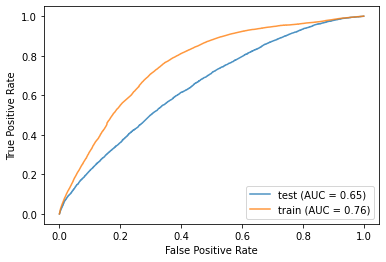

In [19]:
ax = plt.gca()
test_rf = plot_roc_curve(mnb, X_test_tf, y_test,ax=ax, alpha=0.8, name="test")
train_rf = plot_roc_curve(mnb,X_train_tf, y_train,ax=ax, alpha=0.8, name="train")
plt.show()
#AUC curve for MultinomialNB

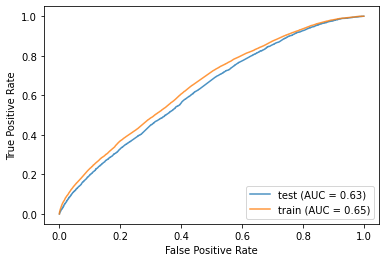

In [20]:
ax = plt.gca()
test_rf = plot_roc_curve(rfc, X_test_tf, y_test,ax=ax, alpha=0.8, name="test")
train_rf = plot_roc_curve(rfc,X_train_tf, y_train,ax=ax, alpha=0.8, name="train")
plt.show()
#AUC curve for RandomForest Classifier

We conclude that the performance of the logistic regression is optimal; this was to be expected given the classificating nature of the tasks. We use that one as the model for gender predictioon

In [21]:
X_test_final = vc_tf_idf.transform(test["keywords"].apply(lambda x: np.str_(x)))

In [22]:
result=pd.DataFrame()
result["ID"]=test["ID"]
result["sex_pred"]=logreg.predict(X_test_final)

In [23]:
result["sex_pred"]=result["sex_pred"].replace(1, "M")
result["sex_pred"]=result["sex_pred"].replace(0, "F")

In [24]:
result.to_csv("test_result.csv",index=False,sep=',')

# Modeling for "Age" Prediction

In [25]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(alpha=0.00001,max_iter=10000,random_state=42)
sgd.fit(X_train_tf,z_train)

SGDRegressor(alpha=1e-05, max_iter=10000, random_state=42)

In [26]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
predictionage = dict()
predictionage["sgd"] = sgd.predict(X_test_tf)
print("Mean square error:%.4f"%(mean_squared_error(z_test,predictionage["sgd"])))
print("Mean absolute error:%.4f"%(mean_absolute_error(z_test,predictionage["sgd"])))
print("R square: ", '{:.2%}'.format(r2_score(z_test,predictionage["sgd"])))

Mean square error:156.6847
Mean absolute error:10.0034
R square:  7.59%


In [27]:
print(classification_report(np.floor((z_test+5)/10)*10,np.floor((predictionage["sgd"]+5)/10)*10))
# 10 stands for age group between 5-15, 20 stands for age group between 15-25 and so on

              precision    recall  f1-score   support

        10.0       0.00      0.00      0.00        45
        20.0       0.00      0.00      0.00       895
        30.0       0.36      0.02      0.03      2474
        40.0       0.35      0.55      0.43      5173
        50.0       0.27      0.53      0.36      4506
        60.0       0.30      0.07      0.11      3044
        70.0       0.31      0.00      0.01      1352
        80.0       0.00      0.00      0.00       167
        90.0       0.00      0.00      0.00        12
       100.0       0.00      0.00      0.00         2

    accuracy                           0.31     17670
   macro avg       0.16      0.12      0.09     17670
weighted avg       0.30      0.31      0.24     17670



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
predictionage["dif"]=predictionage["sgd"]-z_test
predictionage["dif"]=predictionage["dif"].map(lambda x: 0 if abs(x)>5 else 1)
print("1 stands for the precision rate of the whole test data")
print(predictionage["dif"].value_counts(1))

1 stands for the precision rate of the whole test data
0    0.691454
1    0.308546
Name: age, dtype: float64


In [29]:
result=pd.read_csv("test_result.csv")
result["age_pred"]=sgd.predict(X_test_final)
result.to_csv("test_result.csv",index=False,sep=',')

Results of the task are saved into "test_results.csv"